[INDICIUM] Ciências de Dados

Desafio de Data Science do processo seletivo 2024 para programa de formação da ligth house.

Inscrito: Ian Lucas Périgo Vianna
Linkedin:
Github:
WhatsApp:

**Desafio**

Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de precificação, pediu para que a Indicium fizesse uma análise exploratória dos dados de seu maior concorrente, assim como um teste de validação de um modelo preditivo.

Seu objetivo é desenvolver um modelo de previsão de preços a partir do dataset oferecido, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema. O uso de outras fontes de dados além do dataset é permitido (e encorajado). Você poderá encontrar em anexo um dicionário dos dados.

# Entregas

    - Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. Seja criativo!
    - Responda também às seguintes perguntas:
        a. Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?
        b. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?
        c. Existe algum padrão no texto do nome do local para lugares de mais alto valor?
    - Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?
    - Supondo um apartamento com as seguintes características:

{'id': 2595,

 'nome': 'Skylit Midtown Castle',

 'host_id': 2845,

 'host_name': 'Jennifer',

 'bairro_group': 'Manhattan',

 'bairro': 'Midtown',

 'latitude': 40.75362,

 'longitude': -73.98377,

 'room_type': 'Entire home/apt',

 'price': 225,

 'minimo_noites': 1,

 'numero_de_reviews': 45,

 'ultima_review': '2019-05-21',

 'reviews_por_mes': 0.38,

 'calculado_host_listings_count': 2,
 
 'disponibilidade_365': 355}

Qual seria a sua sugestão de preço?

    

# Instruções de Entrega:
- Você tem até 7 dias corridos para a entrega, contados a partir do recebimento deste desafio.
- Envie o seu relatório dentro da sua data limite para o email: selecao.lighthouse@indicium.tech
- O arquivo de entrega deve ser nomeado como: LH_CD_SEUNOME
- Salve o modelo desenvolvido no formato .pkl. 
- A entrega deve ser feita através de um repositório de código público que contenha:
    - README explicando como instalar e executar o projeto
    - Arquivo de requisitos com todos os pacotes utilizados e suas versões
    - Relatórios das análises estatísticas e EDA em PDF, Jupyter Notebook ou semelhante conforme passo 1 e 2.
    - Códigos de modelagem utilizados no passo 3 (pode ser entregue no mesmo Jupyter Notebook).
    - Arquivo .pkl conforme passo 5 acima.
- Todos os códigos produzidos devem seguir as boas práticas de codificação.

# Dicionário dos dados
## A base de dados de treinamento contém 16 colunas. Seus nomes são auto-explicativos, mas, caso haja alguma dúvida, a descrição das colunas é:

- id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo
- nome - Representa o nome do anúncio
- host_id - Representa o id do usuário que hospedou o anúncio
- host_name – Contém o nome do usuário que hospedou o anúncio
- bairro_group - Contém o nome do bairro onde o anúncio está localizado
- bairro - Contém o nome da área onde o anúncio está localizado
- latitude - Contém a latitude do local
- longitude - Contém a longitude do local
- room_type – Contém o tipo de espaço de cada anúncio
- price - Contém o preço por noite em dólares listado pelo anfitrião
- minimo_noites - Contém o número mínimo de noites que o usuário deve reservar
- numero_de_reviews - Contém o número de comentários dados a cada listagem
- ultima_review - Contém a data da última revisão dada à listagem
- reviews_por_mes - Contém o número de avaliações fornecidas por mês
- calculado_host_listings_count - Contém a quantidade de listagem por host
- disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva

# Etapas:

## - [X] Visualizar os dados
## - [ ]Manipular e preparar os dados
## - [ ]Análise exploratória (EDA)
## - [ ]Decidir modelos de machine learning
## - [ ]Testes, Resultados e Hipóteses
## - [ ]Entregar demandas do desafio

In [27]:
# Dependências
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import missingno as msno

# Visualizar Dados
- Análise geral das features
- Distingguir formato das features (int, float, char)
- Identificar anomalias, dados ausentes e erros

In [45]:
host = pd.read_csv('C:/Users/ianpv/OneDrive/Light_house/teste_indicium_precificacao.csv')
host.describe()


,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Notamos que algumas features apresentam valores máximos e mínimos que podem indicar anomalias, examinaremos e possivelmente trataremos esses outliers.

In [46]:
# Análise Geral
numericos.info()

print('\n')
# Segregação de Dados por Tipo de Dados
colunas_por_dtype = host.columns.to_series().groupby(host.dtypes).groups

for dtype, colunas in colunas_por_dtype.items():
    print(f"Tipo de Dados: {dtype}")
    print(", ".join(colunas))
    print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [47]:
# Dividir os dados em categóricos e numéricos

categoricos = host.select_dtypes(include='object')
numericos = host.select_dtypes(exclude='object')


In [48]:
categoricos.sample(20)

,nome,host_name,bairro_group,bairro,room_type,ultima_review
41668,fabulous & large bedroom - East Williamsburg,Lily,Brooklyn,Williamsburg,Private room,2019-06-14
26734,Cozy room and a private bathroom bklyn :),Chadanut,Brooklyn,Kensington,Private room,2019-06-17
13905,Beautiful designer studio on 1st,Gosia,Brooklyn,Park Slope,Entire home/apt,2019-06-23
41237,Tourists Summer Getaway in New York,Peter,Queens,Ridgewood,Private room,2019-06-25
40142,Large bedroom with a private terrace in Astoria,Yasha,Queens,Astoria,Private room,2019-04-11
13089,Cozy Williamsburg,Bil,Brooklyn,Williamsburg,Private room,NaN
1704,"Very large, clean 1 BR apartment",Tauheed,Manhattan,East Harlem,Entire home/apt,2019-07-02
39886,Living room at prime location,Satish,Brooklyn,Sunset Park,Shared room,2019-01-14
12414,Cozy studio in Brooklyn,Karlee,Brooklyn,Windsor Terrace,Entire home/apt,NaN
21273,"Cozy 1br apartment, 25 min away from Manhattan",Raquel,Queens,Ditmars Steinway,Entire home/apt,2019-01-05


In [49]:
numericos.sample(20)

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
10535,8085420,42700722,40.79985,-73.93836,35,120,0,NaN,1,0
37862,29964050,128230715,40.68012,-73.94795,200,3,1,0.68,1,11
6801,4866426,2346300,40.68983,-73.99114,80,1,168,3.11,1,272
35108,27839683,210218941,40.69590,-73.84868,51,7,3,1.00,1,2
34993,27735744,209405908,40.75658,-73.99568,100,1,41,3.80,3,64
46699,35385949,263778743,40.64621,-73.96208,60,14,0,NaN,1,76
40406,31319380,234440538,40.77905,-73.95350,150,1,0,NaN,1,0
44243,34124683,10962595,40.61859,-74.03644,60,28,0,NaN,1,263
48597,36334586,262999899,40.75941,-73.99179,239,7,0,NaN,1,77
4856,3463475,1384256,40.71812,-73.98619,197,1,285,4.83,1,8


In [50]:
# Verificar valores nulos nos dados categoricos
print('Valores nulos dos dados categoricos em porcentagem')
print(categoricos.isnull().mean() * 100)

Valores nulos dos dados categoricos em porcentagem
nome              0.032724
host_name         0.042950
bairro_group      0.000000
bairro            0.000000
room_type         0.000000
ultima_review    20.558760
dtype: float64


Por se tratar de um feature de avaliação do imóvel que pode ter algum tipo de influência sobre preço ou outras variáveis importantes. Iremos posteriormente analisar as formas de inputação mais adequadas e na parte de manipulação de dados inputar.

In [51]:
print('Valores nulos dos dados numéricos em porcentagem')
print(numericos.isnull().mean() * 100)

Valores nulos dos dados numéricos em porcentagem
id                                0.00000
host_id                           0.00000
latitude                          0.00000
longitude                         0.00000
price                             0.00000
minimo_noites                     0.00000
numero_de_reviews                 0.00000
reviews_por_mes                  20.55876
calculado_host_listings_count     0.00000
disponibilidade_365               0.00000
dtype: float64


<Axes: >

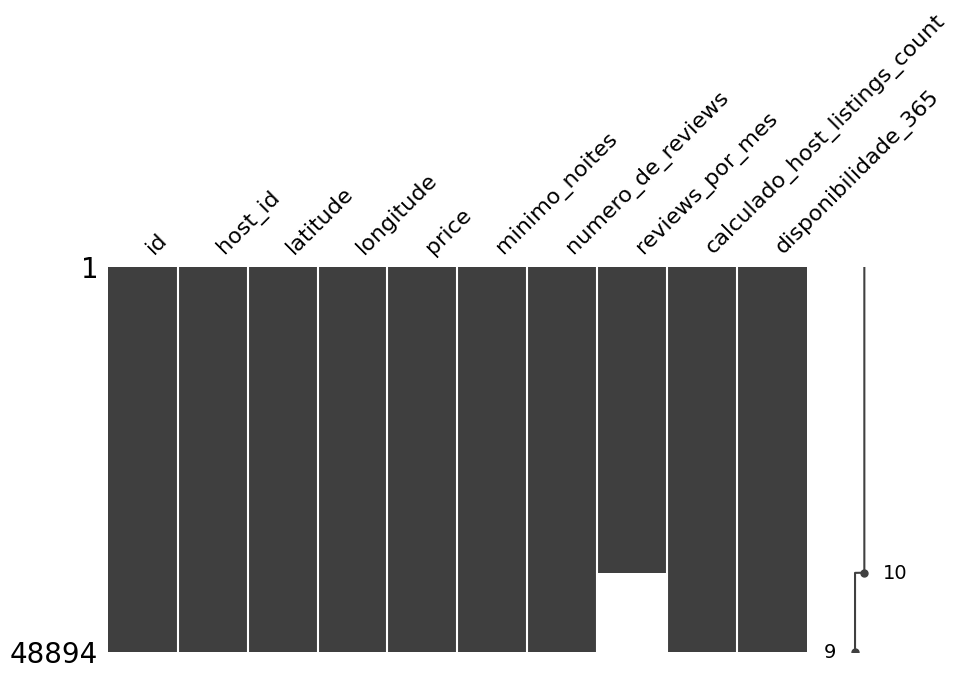

In [52]:
# Plotando o gráfico de missing values do dataset original
matrix = numericos.sort_values('reviews_por_mes')
msno.matrix(matrix, figsize=(10, 5))

Há correlação direta entre valores nulos das features de ultima review e reviews por mês. Não observamos valores nulos na feature de números de review, porém esta pode apresentar valores zerados. Abaixo calcularemos o valores dessa feature quando as reviews são nulas.

In [53]:
indicium_reviews = numericos[['reviews_por_mes', 'numero_de_reviews']]
# vamos imprimir apenas as linhas que possuem valores nulos das features ultima_review e reviews_por_mes
indicium_reviews[indicium_reviews.isnull().any(axis=1)]
#vamos confirmar se todos os valores 0 de numero_de_reviews possuem valores nulos em ultima_review e reviews_por_mes
indicium_reviews[indicium_reviews['numero_de_reviews'] == 0].isnull().sum()

reviews_por_mes      10052
numero_de_reviews        0
dtype: int64

In [54]:
# Calculando a quantidade de valores iguais a zero na disponibilidade_365

dispobibilidade_zeros = (numericos['disponibilidade_365'] == 0).sum()
print('Número de valores 0 em disponibilidade_365: {}'.format(dispobibilidade_zeros))
# calculando a porcentagem de valores iguais a zero na disponibilidade_365
disponibility_zero_percent = (dispobibilidade_zeros / numericos.shape[0]) * 100
print('Porcentagem de valores 0 em disponibilidade_365: {:.2f}%'.format(disponibility_zero_percent))
print('\n')
price_zero = (numericos['price'] == 0).sum()
price_zero_percent = (price_zero / numericos.shape[0])*100
print('Número de valores 0 em preço: {}'.format(price_zero))
print ('Porcentagem de valores 0 em price: {:.2f}%'.format(price_zero_percent))

Número de valores 0 em disponibilidade_365: 17533
Porcentagem de valores 0 em disponibilidade_365: 35.86%


Número de valores 0 em preço: 11
Porcentagem de valores 0 em price: 0.02%


A quantidade de valores 0 na disponibilidade é muito elevada, por se tratar de uma feature relacionada com a entrega "B" do desafio devemos posteriormente tratá-las. O uso da média é o mais indicado para não alterar a distribuição estatística.

In [55]:
# Vamos calcular a média, mediana e moda de ultima_review, reviews_por_mes, numero_de_reviews e Disponibilidade_365

#Categórico
mode_ultima_review = categoricos['ultima_review'].mode()
print('Moda de ultima_review: {}'.format(mode_ultima_review[0]))
print('\n')

# Não Categórico
mean_last_review = numericos['reviews_por_mes'].mean()
median_ultima_review = numericos['reviews_por_mes'].median()
mode_ultima_review = numericos['reviews_por_mes'].mode()
print('Média de reviews_por_mes: {:.2f}'.format(mean_last_review))
print('Mediana de reviews_por_mes: {:.2f}'.format(median_ultima_review))
print('Moda de reviews_por_mes: {:.2f}'.format(mode_ultima_review[0]))
print('\n')
mean_numero_de_reviews = numericos['numero_de_reviews'].mean()
median_numero_de_reviews = numericos['numero_de_reviews'].median()
mode_numero_de_reviews = numericos['numero_de_reviews'].mode()
print('Média de numero_de_reviews: {:.2f}'.format(mean_numero_de_reviews))
print('Mediana de numero_de_reviews: {:.2f}'.format(median_numero_de_reviews))
print('Moda de numero_de_reviews: {:.2f}'.format(mode_numero_de_reviews[0]))

mean_disponibilidade_365 = numericos['disponibilidade_365'].mean()
median_disponibilidade_365 = numericos['disponibilidade_365'].median()
mode_disponibilidade_365 = numericos['disponibilidade_365'].mode()
print('\n')
print('Média de disponibilidade_dias_365: {:.2f}'.format(mean_disponibilidade_365))
print('Mediana de disponibilidade_dias_365: {:.2f}'.format(median_disponibilidade_365))
print('Moda de disponibilidade_dias_365: {:.2f}'.format(mode_disponibilidade_365[0]))




Moda de ultima_review: 2019-06-23


Média de reviews_por_mes: 1.37
Mediana de reviews_por_mes: 0.72
Moda de reviews_por_mes: 0.02


Média de numero_de_reviews: 23.27
Mediana de numero_de_reviews: 5.00
Moda de numero_de_reviews: 0.00


Média de disponibilidade_dias_365: 112.78
Mediana de disponibilidade_dias_365: 45.00
Moda de disponibilidade_dias_365: 0.00


# Manipulando e Preparando os dados
- Imputando valores ausentes e nulos
    - Features categóricas
    - Features não categóricas
- Diagnosticar e tratar Outliers
- Transformação de dados
- Tidy Data

### Vamos fazer imputação simples de dados categoricos com a moda e mediana.
### Vamos abordar as técnicas de imputação de dados mais avançadas:
- Multiple Imputation by Chained Equations (MICE)
- Utilizar aprendizagem de máquina para escolha do valor adequado
- InterativeImputer (regressão múltipla)



In [56]:
# Dependências
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [57]:
# Inputar valores nulos da feature ultima_review que é categórica com a moda

#Cópia profunda dos dados categóricos
categoricos_input = categoricos.copy(deep=True)

modal_ultima_review = categoricos_input['ultima_review'].mode()[0]
categoricos_input['ultima_review']= categoricos_input['ultima_review'].fillna(modal_ultima_review)

# Verificar se os valores nulos foram inputados
print(categoricos_input.isnull().sum())

nome             16
host_name        21
bairro_group      0
bairro            0
room_type         0
ultima_review     0
dtype: int64


In [58]:
categoricos_input.head()

,nome,host_name,bairro_group,bairro,room_type,ultima_review
0,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21
1,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,2019-06-23
2,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05
3,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,2018-11-19
4,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,Murray Hill,Entire home/apt,2019-06-22


Foi escolhido a imputação MICE usando o módulo iterativeimputer do sklearn.
Foi realizado um teste com a imputação com o módulo KNNImputer, porém esta teve um desempenho pior em termos de demora de execução.

In [59]:
# Imputando os valores nulos com InterativeImputer

numericos_input = numericos.copy(deep=True)

# Pesquisar a melhor quantidade de iterações
mice_imputer = IterativeImputer(max_iter=10, random_state=0)

# Selecione apenas as colunas numéricas para a imputação
cols_numericas = ['numero_de_reviews', 'reviews_por_mes']
numericos_input[cols_numericas] = mice_imputer.fit_transform(numericos_input[cols_numericas])


In [60]:
# Verificando se ainda existem valores nulos
numericos_input.isnull().sum()

id                               0
host_id                          0
latitude                         0
longitude                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

In [65]:
# inputar valores iguais a zero em disponibilidade_365 com a mediana
#mediana_disponibilidade_365 = numericos_input['disponibilidade_365'].median()
numericos_input['disponibilidade_365'] = numericos_input['disponibilidade_365'].replace(0, mediana_disponibilidade_365)

print('Número de valores 0 em disponibilidade_365: {}'.format((numericos_input['disponibilidade_365'] == 0).sum()))


Número de valores 0 em disponibilidade_365: 0


In [66]:
numericos_input.head()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,2845,40.75362,-73.98377,225,1,45.0,0.380000,2,355
1,3647,4632,40.80902,-73.94190,150,3,0.0,0.811471,1,365
2,3831,4869,40.68514,-73.95976,89,1,270.0,4.640000,1,194
3,5022,7192,40.79851,-73.94399,80,10,9.0,0.100000,1,45
4,5099,7322,40.74767,-73.97500,200,3,74.0,0.590000,1,129


Dividimos o data frame em atributos categoricos e não categoricos visualizamos as features que precisavam de inputação, aplicamos diferentes abordagens para cada cenário levando em consideração o tipo de dado, porcentagem de valores ausentes. Abordamos a inputação de dados por meio de técnicas simples(mediana, moda) e por meio da técnica avançada "MICE" que realiza múltiplas imputações encadeadas. 

### Possíveis abordagens para tratar Outliers:
- Regra empírica (para distribuição normal)
- IQR
- z-score

In [129]:
#Dependências necessárias

from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from scipy import stats

In [130]:
#Função para implementar a regra empírica de 68-95-99.7

def drop_outliers(df, z_thresh=3):
    df2 = df.copy()
    m = df2[field_name].mean()
    sd = df2[field_name].std() 
    upper = m + k*sd
    lower = m - k*sd
    i_up = df2[df2[field_name] > upper].index
    i_lo = df2[df2[field_name] < lower].index
    df2.drop(i_up, axis=0, inplace=True)
    df2.drop(i_lo, axis=0, inplace=True)
    return df2

In [131]:
def drop_outliers_std_v2(df, field_name, k=3):
    mean, std = df[field_name].mean(), df[field_name].std()
    lower, upper = mean - k*std, mean + k*std
    return df.query(f'{lower} <= {field_name} <= {upper}').copy()


In [132]:
def drop_outliers_3std(df, field_name):
  df2 = df.copy()
  m = df2[field_name].mean()
  sd = df2[field_name].std() 
  upper = m + 3*sd
  lower = m - 3*sd
  i_up = df2[df2[field_name] > upper].index
  i_lo = df2[df2[field_name] < lower].index
  df2.drop(i_up, axis=0, inplace=True)
  df2.drop(i_lo, axis=0, inplace=True)
  return df2

<Axes: >

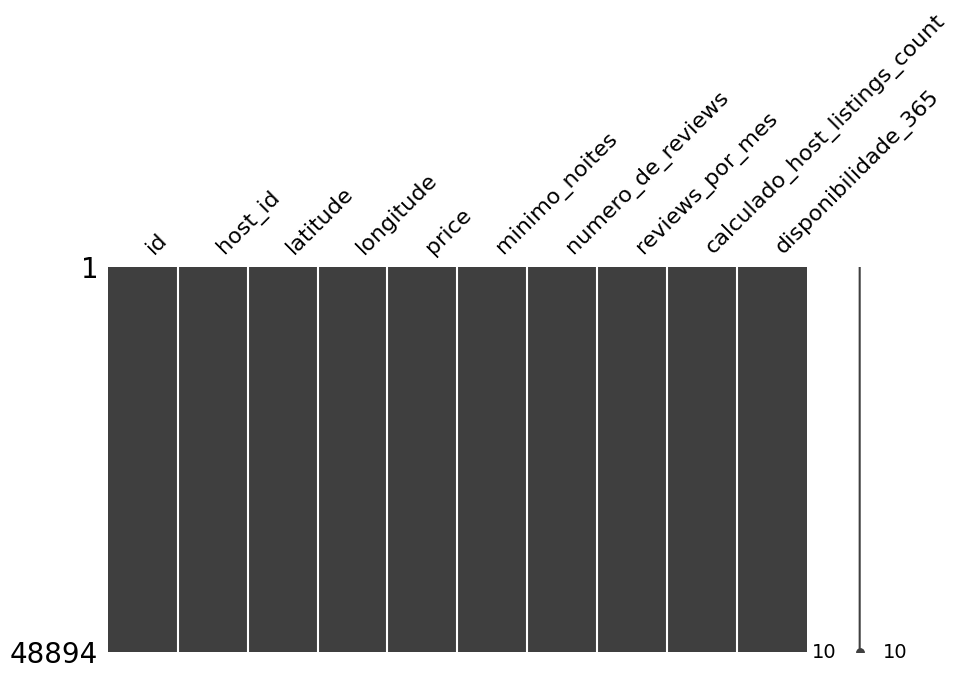

In [145]:
matrix = numericos_input.sort_values('reviews_por_mes')
msno.matrix(matrix, figsize=(10, 5))

In [135]:
indicium_df1 = drop_outliers_3std(df_numericos,'price')
indicium_df1v2 = drop_outliers_std_v2(df_numericos,'price')

IndexError: invalid index to scalar variable.

C:\Users\ianpv\AppData\Local\Temp\ipykernel_18276\1072430555.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=indicium_int_float,y='price',palette="muted",ax=axes[0])


C:\Users\ianpv\AppData\Local\Temp\ipykernel_18276\1072430555.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=indicium_df1,y='price',palette="muted",ax=axes[1])


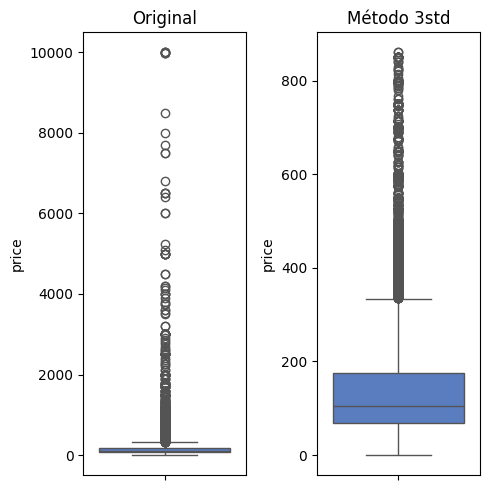

In [83]:
fig, axes = plt.subplots(ncols=2, figsize=(5,5))
sns.boxplot(data=indicium_int_float,y='price',palette="muted",ax=axes[0])
axes[0].set_title("Original")
sns.boxplot(data=indicium_df1,y='price',palette="muted",ax=axes[1])
axes[1].set_title("Método 3std")
plt.tight_layout()
plt.show()

In [84]:
ind_df1 = drop_outliers_3std(indicium_int_float,'numero_de_reviews')

In [85]:
def drop_outliers_z(df,col,k=3):
  z_values = np.abs(stats.zscore(df[col]))
  return df[z_values < k]

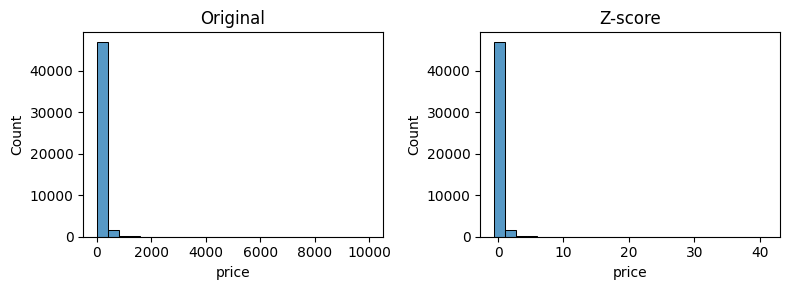

In [86]:
fig, axes = plt.subplots(ncols=2,figsize=(8,3))
sns.histplot(indicium_int_float['price'],bins=25,ax=axes[0])
axes[0].set(title="Original")
sns.histplot(stats.zscore(indicium_int_float['price']),bins=25,ax=axes[1])
axes[1].set(title="Z-score")
plt.tight_layout()

In [87]:
ind_z=np.abs(stats.zscore(indicium_int_float['price']))

In [88]:
ind_df3 = indicium_int_float[ind_z<3]

In [89]:
ind_df4 = drop_outliers_z(indicium_int_float,'price')

<Axes: xlabel='price', ylabel='Count'>

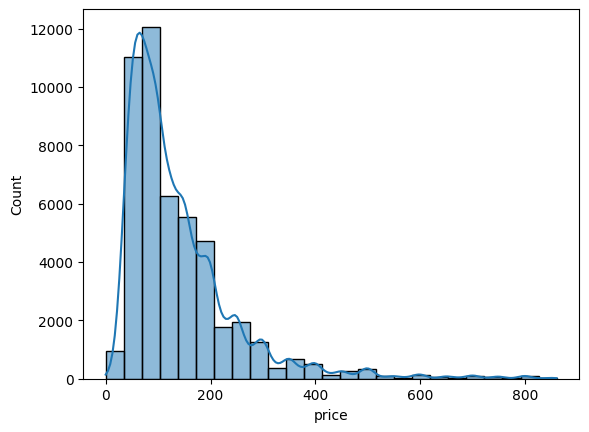

In [90]:
sns.histplot(ind_df3['price'],bins=25,kde=True)

<Axes: xlabel='price', ylabel='Count'>

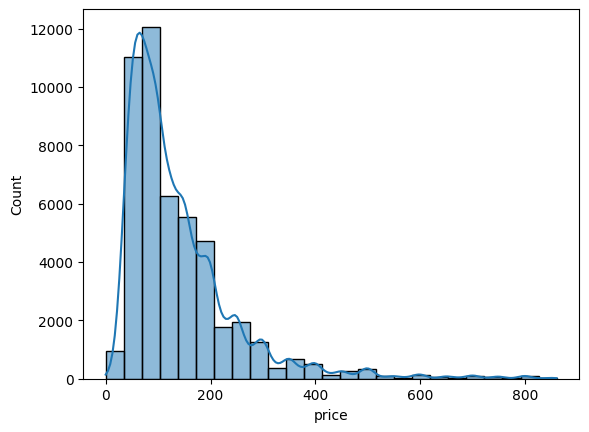

In [91]:
sns.histplot(ind_df4['price'],bins=25,kde=True)

Text(0.5, 1.0, 'Original')

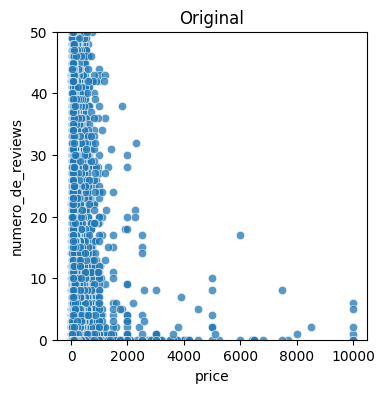

In [92]:
plt.subplots(figsize=(4,4))
sns.scatterplot(data=indicium_int_float,x='price',y='numero_de_reviews',alpha=0.75)
plt.ylim(0,50)
plt.title("Original")

Text(0.5, 1.0, 'z-score')

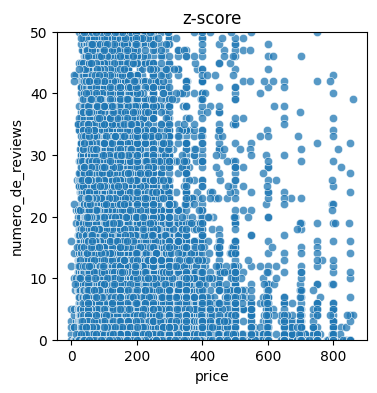

In [93]:
plt.subplots(figsize=(4,4))
sns.scatterplot(data=ind_df4,x='price',y='numero_de_reviews',alpha=0.75)
plt.ylim(0,50)
plt.title("z-score")

# EDA

### Objetivos:
- Definir os atributos mais adequados.
- Encontrar padrões
- Validar resultados.
- Refinar Features que serão utilizados para ML

### Meios:
- EDA para garantir os melhores resultados para o projeto.


### Finalização:
- Resumo de dados através de estatísticas descritivas

**Métodos**
- Análise univariada - fornece estatísticas resumidas para cada atributo dos dados brutos
- Análise bivariada - busca relação entre cada atributo nos dados e a variável alvo
- Análise multivariada - busca por interações entre diferentes atributos nos dados
- Redução da dimensionalidade - ajuda a identificar os atributos mais relevante dos dados e permite o processamento de um volume reduzido de dados.